<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/1_getting_started_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
% cd "/content/drive/My Drive/Colab_Notebooks/data_tools/nltk"

/content/drive/My Drive/Colab_Notebooks/data_tools/nltk


[**NLTK-Book**](http://www.nltk.org/book/)

<h2>1. Downloads and Imports</h2>

In [ ]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict

print(f'nltk version: {nltk.__version__}')

nltk version: 3.2.5


In [ ]:
nltk.download()
from nltk.book import *

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> book
Command 'book' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downlo

<h2>2. Searching Text:</h2>

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick.



In [ ]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


What other words appear in a similar range of contexts as monstrous? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [ ]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [ ]:
text2.concordance('monstrous')

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [ ]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very

In [ ]:
text2.common_contexts(['monstrous','very'])

a_pretty am_glad a_lucky is_pretty be_glad


In [ ]:
text1.common_contexts(['monstrous', 'perilous'])

most_and


we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text

Lexical Dispersion Plot for Words in U.S. Presidential Inaugural Addresses: This can be used to investigate changes in language use over time

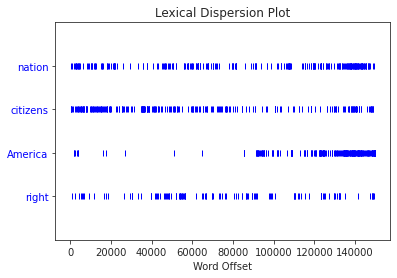

In [ ]:
sns.set_style('ticks')
text4.dispersion_plot(['nation', 'citizens', 'America', 'right'])

<h2>3. Counting Vocabulary:</h2>

In this section we will see how to use the computer to count the words in a text in a variety of useful ways

In [ ]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or **`"tokens."`** A token is the technical name for a sequence of characters — such as hairy, his, or...<br>How many distinct words does the book of Genesis contain?  The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. We can find this with `set(text3)`

In [ ]:
type(text1)

nltk.text.Text

In [ ]:
def get_unique_tokens(text):
    """Find the unique tokens in a text

    @param text: an nltk.text.Text object
    @return: two items, first is the count,
            second is a list of unique items
    """
    unique_list = list(sorted(set(text)))
    return len(unique_list), unique_list

In [ ]:
unique_text3 = get_unique_tokens(text3)
print(f'Genesis contains {unique_text3[0]} unique tokens\n')
unique_text3[1][:20]

Genesis contains 2789 unique tokens



['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

**lexical richness of the text:**<br>
The lexical richness of the text computes the ratio of unique words to the number of distinct words in the text.
Let's write a function to print the lexical richness for all texts here

In [ ]:
# First get the titles
titles = ['text1: Moby Dick by Herman Melville 1851', \
          'text2: Sense and Sensibility by Jane Austen 1811', \
          'text3: The Book of Genesis', \
          'text4: Inaugural Address Corpus', \
          'text5: Chat Corpus', \
          'text6: Monty Python and the Holy Grail', \
          'text7: Wall Street Journal', \
          'text8: Personals Corpus', \
          'text9: The Man Who Was Thursday by G . K . Chesterton 1908']
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [ ]:
def lexical_richness(texts=texts, titles=titles):
    dictt = {}
    for text, title in zip(texts, titles):
        key = title[:5]
        unique_tokens = get_unique_tokens(text)[0]
        total_tokens = len(text)
        richness = round((unique_tokens / total_tokens)*100, 2)
        dictt[key] = richness

    return dictt

In [ ]:
lex_richness = lexical_richness()
print(lex_richness)

{'text1': 7.41, 'text2': 4.83, 'text3': 6.23, 'text4': 6.62, 'text5': 13.48, 'text6': 12.77, 'text7': 12.32, 'text8': 22.77, 'text9': 9.83}


Now to identify the text that has the highest lexical richness, simply use the max().

In [ ]:
max(lex_richness, key=lex_richness.get)

'text8'

<h2>A Closer Look at Python: Texts as Lists of Words</h2>